# Comparison of SDOT bike collision stats and SPD bike enforcement rates

##### Ethan C. Campbell, for Central Seattle Greenways / Helmet Law Working Group

For questions, contact me at ethanchenbell@gmail.com.

#### Import packages and set file system

In [240]:
%matplotlib inline
from numpy import *
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_colwidth',50)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300     # turn on for higher-quality figure export
from datetime import datetime, timedelta
import platform
import warnings
import sys

from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

# choose root directory for data files
if platform.system() == 'Darwin':
    data_dir = '/Users/Ethan/Documents/Finances and records/2020-06-30 - Helmet Law Working Group/Data/'
    results_dir = '/Users/Ethan/Documents/Finances and records/2020-06-30 - Helmet Law Working Group/Figures/'
elif platform.system() == 'Linux':
    data_dir = '/dat1/ethancc/CSG/'
    results_dir = data_dir
    
# set directory paths
current_results_dir = results_dir + '2021-12-13 - SDOT bike injury stats vs. SPD citations/'

#### Load compiled individual bike citation records (2003-2021; incomplete)

Note: file created previously in Jupyter notebook [***csg_compile_king_county_bike_citations.ipynb***](https://github.com/ethan-campbell/Miscellaneous/blob/master/csg_compile_king_county_bike_citations.ipynb), which is available on my GitHub.

In [3]:
kc_citations = pd.read_excel(data_dir + '2021-10-18 - compiled King County bike citation records.xlsx').drop(columns=['Unnamed: 0'])
spd_citations = kc_citations[kc_citations['Law Enforcement Agency'] == 'Seattle Police Department']
spd_citations.head(3)

,Court Name,Case Number,Case Key (KCDC) or Token (MCs),Case Type,Case File Date,Law Enforcement Agency,Violation Date,Law Code,Law Description,Disposition,Disposition Date,Defendant Gender,Defendant Race,Defendant Ethnicity,Officer Badge Number,AR Ordered Amount,AR Adjustment Amount,AR Paid Amount,AR Due Amount,Originating Query,City,Violation Datetime,Officer First Name,Officer Middle Name,Officer Last Name,AR Adjusted Amount
1658,King County District Court,8Z0505330,37573291,Infraction,2018-08-27,Seattle Police Department,2018-08-25,RCW 46.61.755,Violating Laws While Riding Bicycle,Committed,2018-10-15,Male,White,Unknown,NaN,NaN,NaN,NaN,NaN,All bike violations (requested KCHC 9.10.010 a...,Seattle,NaT,NaN,NaN,NaN,NaN
1756,King County District Court,I10974250,38502744,Infraction,2007-08-20,Seattle Police Department,2007-08-17,King County Health Code 9.10.010A or 9.15.010,Bicycle Helmet Required,Committed,2009-11-03,Male,Black,Unknown,NaN,NaN,NaN,NaN,NaN,All bike violations (requested KCHC 9.10.010 a...,Seattle,NaT,NaN,NaN,NaN,NaN
1757,King County District Court,I11111192,38621778,Infraction,2008-09-29,Seattle Police Department,2008-09-19,King County Health Code 9.10.010A or 9.15.010,Bicycle Helmet Required,Committed,2009-10-30,Male,White,Unknown,NaN,NaN,NaN,NaN,NaN,All bike violations (requested KCHC 9.10.010 a...,Seattle,NaT,NaN,NaN,NaN,NaN


In [87]:
# from individual Seattle Municipal Court records (and possibly a handful of odd KCDC entries from WA AOC records)
# NOTE: these records are ≥99% complete only from 2014 onwards, except for 2016 (72% complete)

cite_count_all_incomplete = spd_citations['Law Code'].groupby(spd_citations['Violation Date'].dt.year).count().drop(1962)
print('All citations:')
display(cite_count_all_incomplete)

citations_helmet_only = spd_citations.loc[spd_citations['Law Code'] == \
                                          'King County Health Code 9.10.010A or 9.15.010']
cite_count_helmet_incomplete = citations_helmet_only['Law Code'].groupby(citations_helmet_only['Violation Date'].dt.year).count()
print('\nHelmet citations only:')
display(cite_count_helmet_incomplete)

All citations:


Violation Date
2003     90
2004    129
2005    134
2006    156
2007    103
2008    139
2009    158
2010    248
2011    235
2012    173
2013    522
2014    293
2015    185
2016    102
2017     97
2018    156
2019    118
2020     24
2021      2
Name: Law Code, dtype: int64


Helmet citations only:


Violation Date
2003      9
2004     67
2005     85
2006     92
2007     58
2008     81
2009    107
2010    163
2011    197
2012    120
2013    323
2014    168
2015     78
2016     19
2017     37
2018     46
2019     29
2020      7
Name: Law Code, dtype: int64

#### Load Seattle Municipal Court summary table of bike citations (2011-2020)

Source: transcribed from Seattle Municipal Court website annual summary table (note: much of this data has since been purged from their records and website)

In [85]:
# load annual bike infraction data
smc_summary_table = pd.read_excel(data_dir + '2020-07-18 - Seattle Municipal Court bike violations (transcribed from online table).xlsx',
                                  index_col=0)
display(smc_summary_table)

,"Bicycle Helmet Required (9.10.010, 9.15.010)",Rider Rights/Duties Violation (11.44.020),R/W in Crosswalk (11.44.100),Riding on Road Rules Violation (11.44.040),No/Improper Lamps/Reflectors (11.44.160),Yield R/W on Public Path (11.44.120),No/Improper Hand Signals (11.44.140),Unsafe Pass on Right (11.44.080),No/Improper Brakes (11.44.200),Ride More Than 2 Abreast Road/Sidewalk (11.44.060),Clinging/Attaching to Vehicle (11.44.240),Control (11.44.260)
Year,,,,,,,,,,,,
2011,607,140,11,4,13,6,1,4,0,0,1,2
2012,306,124,11,3,14,1,2,2,0,0,1,1
2013,341,197,7,2,10,1,2,4,0,0,0,0
2014,168,108,4,2,4,4,1,1,0,0,0,1
2015,76,81,6,3,6,3,0,5,0,0,1,0
2016,41,71,4,2,6,1,1,2,0,0,0,0
2017,33,34,9,3,6,2,3,3,1,0,0,0
2018,46,78,5,6,7,3,4,5,0,1,0,0
2019,29,65,7,6,4,2,2,1,1,0,0,1


#### Load Seattle Municipal Court historical data on bike citations, from Seattle Times (1990-2014)

Source: *Seattle Times*, "The cop and the courier: Seattle’s top-ticketing officer, and its most-ticketed cyclist" by Gene Balk (July 15, 2015)

In [86]:
from IPython.display import Image
display(Image(url='https://static.seattletimes.com/wp-content/uploads/2015/07/aed058d2-2b4d-11e5-bef9-f00a1a6eacb9-1560x1133.jpg',
              width=500,height=300))

seattle_historical = pd.Series(index=arange(1990,2015),
                               data=[143,149,172,125,161,157,142,179,101,141,150,152,159,
                                     197,195,215,478,289,577,525,656,733,405,501,270])

#### Compile single time series of citation data

In [277]:
annual_citations = pd.DataFrame(index=range(1990,2021+1),
                                data={'Total bike citations':tile(NaN,2021+1-1990),
                                      'Total bike citations - data source':tile('',2021+1-1990),
                                      'Helmet citations':tile(NaN,2021+1-1990),
                                      'Helmet citations - data source':tile('',2021+1-1990)})
for year in annual_citations.index:
    if year in seattle_historical.index:
        annual_citations.loc[year,'Total bike citations'] = seattle_historical.loc[year]
        annual_citations.loc[year,'Total bike citations - data source'] = 'Seattle Times (1990-2014)'
    if year in smc_summary_table.index:
        tot = smc_summary_table.sum(axis=1).loc[year]
        hel = smc_summary_table.loc[year,'Bicycle Helmet Required (9.10.010, 9.15.010)']
        if isnan(annual_citations.loc[year,'Total bike citations']) \
                or tot >= annual_citations.loc[year,'Total bike citations']:
            annual_citations.loc[year,'Total bike citations'] = tot
            annual_citations.loc[year,'Total bike citations - data source'] = 'Seattle Municipal Court summary (2011-2020)'
        annual_citations.loc[year,'Helmet citations'] = hel
        annual_citations.loc[year,'Helmet citations - data source'] = 'Seattle Municipal Court summary (2011-2020)'
    if year in cite_count_all_incomplete.index:
        tot = cite_count_all_incomplete.loc[year]
        if isnan(annual_citations.loc[year,'Total bike citations']) \
                or tot >= annual_citations.loc[year,'Total bike citations']:
            annual_citations.loc[year,'Total bike citations'] = tot
            annual_citations.loc[year,'Total bike citations - data source'] = 'Seattle Municipal Court records (2003-2021)'
    if year in cite_count_helmet_incomplete.index:
        hel = cite_count_helmet_incomplete.loc[year]
        if (isnan(annual_citations.loc[year,'Helmet citations']) \
                    or hel >= annual_citations.loc[year,'Helmet citations']):
            if year >= 2011:
                annual_citations.loc[year,'Helmet citations'] = hel
                annual_citations.loc[year,'Helmet citations - data source'] = 'Seattle Municipal Court records (2003-2021)'
            elif year < 2011:
                tot = cite_count_all_incomplete.loc[year]
                hel_ratio = hel / tot
                annual_citations.loc[year,'Helmet citations'] = hel_ratio * annual_citations.loc[year,'Total bike citations']
                annual_citations.loc[year,'Helmet citations - data source'] = 'Estimated from total using fraction of helmet citations in Seattle Municipal Court records (2003-2011)'

# insufficient data for 2021
annual_citations = annual_citations.drop(2021)

display(annual_citations)

,Total bike citations,Total bike citations - data source,Helmet citations,Helmet citations - data source
1990,143.0,Seattle Times (1990-2014),NaN,
1991,149.0,Seattle Times (1990-2014),NaN,
1992,172.0,Seattle Times (1990-2014),NaN,
1993,125.0,Seattle Times (1990-2014),NaN,
1994,161.0,Seattle Times (1990-2014),NaN,
1995,157.0,Seattle Times (1990-2014),NaN,
1996,142.0,Seattle Times (1990-2014),NaN,
1997,179.0,Seattle Times (1990-2014),NaN,
1998,101.0,Seattle Times (1990-2014),NaN,
1999,141.0,Seattle Times (1990-2014),NaN,


#### Load SDOT raw bike collision/injury/fatality data

Note: collision data set was obtained from https://data.seattle.gov/dataset/Collisions/m2eh-6pdv and is current as of December 1, 2021.

Description of data available at: https://www.seattle.gov/Documents/Departments/SDOT/GIS/Collisions_OD.pdf.

In [398]:
# note: will take ~30 sec to load
sdot_collisions = pd.read_csv(data_dir + '2021-12-13 - SDOT traffic collisions data.csv',
                              parse_dates=['INCDTTM'],low_memory=False)

In [399]:
sdot_collisions['INCDATE_DT'] = sdot_collisions['INCDTTM'].dt.date
bike_collision_mask = sdot_collisions['SDOT_COLDESC'].str.contains('PEDALCYCLIST').astype(bool)
collision_subset = sdot_collisions[['INCDATE_DT','INJURIES','SERIOUSINJURIES','FATALITIES']].loc[bike_collision_mask]
collision_subset['INJURIES'] = collision_subset['INJURIES'].clip(upper=1)
collision_subset['SERIOUSINJURIES'] = collision_subset['SERIOUSINJURIES'].clip(upper=1)
collision_subset['FATALITIES'] = collision_subset['FATALITIES'].clip(upper=1)
collision_subset.loc[collision_subset['FATALITIES'] == 1,'SERIOUSINJURIES'] = 0
collision_subset.loc[collision_subset['FATALITIES'] == 1,'INJURIES'] = 0
collision_subset.loc[collision_subset['SERIOUSINJURIES'] == 1,'INJURIES'] = 0
sdot_summary_estimated = collision_subset.groupby(collision_subset['INCDATE_DT'].astype(datetime64).dt.year).sum().drop(2003)
display(sdot_summary_estimated)

,INJURIES,SERIOUSINJURIES,FATALITIES
INCDATE_DT,,,
2004,182,25,1
2005,213,22,1
2006,267,31,3
2007,262,47,1
2008,279,29,2
2009,291,23,4
2010,269,21,1
2011,287,21,2
2012,293,20,1


#### Load SDOT-processed bike collision/injury/fatality summary stats

Data transcribed from Table 19 ("Bicycle Collisions") in [SDOT's 2020 Traffic Report](http://www.seattle.gov/Documents/Departments/SDOT/About/DocumentLibrary/Reports/2020_Traffic_Report.pdf), which is based on Seattle PD collision reports (also see Fig. 22)

In [342]:
sdot_summary = pd.read_excel(data_dir + '2021-12-13 - SDOT traffic collisions stats (Table 19).xlsx',index_col='Year')
display(sdot_summary)

,Total Collisions,Possible/Evident Injury,Serious Injury,Fatal Collisions
Year,,,,
2009,383,320,59,4
2010,364,315,48,1
2011,362,319,41,2
2012,387,358,28,1
2013,421,365,54,2
2014,380,316,21,1
2015,483,404,25,1
2016,440,352,26,3
2017,393,324,19,2


#### Compile single time series of collision data

In [400]:
annual_collisions = pd.DataFrame(index=range(2004,2021+1),
                                 data={'Total injuries and deaths':tile(NaN,2021+1-2004),
                                       'Total injuries and deaths - data source':tile('',2021+1-2004),
                                       'Serious injuries and deaths':tile(NaN,2021+1-2004),
                                       'Serious injuries and deaths - data source':tile('',2021+1-2004)})
sdot_summary_estimated_total = sdot_summary_estimated.sum(axis=1)
sdot_summary_total = sdot_summary[['Possible/Evident Injury','Serious Injury','Fatal Collisions']].sum(axis=1)
for year in annual_collisions.index:
    if year in sdot_summary_estimated_total.index:
        annual_collisions.loc[year,'Total injuries and deaths'] = sdot_summary_estimated_total.loc[year]
        annual_collisions.loc[year,'Total injuries and deaths - data source'] = 'Estimated from SDOT/SPD records (2004-2021)'
        annual_collisions.loc[year,'Serious injuries and deaths'] = \
            sdot_summary_estimated.loc[year,'SERIOUSINJURIES'] + sdot_summary_estimated.loc[year,'FATALITIES']
        annual_collisions.loc[year,'Serious injuries and deaths - data source'] = 'Estimated from SDOT/SPD records (2004-2021)'
    if year in sdot_summary_total.index:
        annual_collisions.loc[year,'Total injuries and deaths'] = sdot_summary_total.loc[year]
        annual_collisions.loc[year,'Total injuries and deaths - data source'] = 'SDOT 2020 Traffic Report (2009-2019)'
        annual_collisions.loc[year,'Serious injuries and deaths'] = \
            sdot_summary.loc[year,'Serious Injury'] + sdot_summary.loc[year,'Fatal Collisions']
        annual_collisions.loc[year,'Serious injuries and deaths - data source'] = 'SDOT 2020 Traffic Report (2009-2019)'

display(annual_collisions)

,Total injuries and deaths,Total injuries and deaths - data source,Serious injuries and deaths,Serious injuries and deaths - data source
2004,208.0,Estimated from SDOT/SPD records (2004-2021),26.0,Estimated from SDOT/SPD records (2004-2021)
2005,236.0,Estimated from SDOT/SPD records (2004-2021),23.0,Estimated from SDOT/SPD records (2004-2021)
2006,301.0,Estimated from SDOT/SPD records (2004-2021),34.0,Estimated from SDOT/SPD records (2004-2021)
2007,310.0,Estimated from SDOT/SPD records (2004-2021),48.0,Estimated from SDOT/SPD records (2004-2021)
2008,310.0,Estimated from SDOT/SPD records (2004-2021),31.0,Estimated from SDOT/SPD records (2004-2021)
2009,383.0,SDOT 2020 Traffic Report (2009-2019),63.0,SDOT 2020 Traffic Report (2009-2019)
2010,364.0,SDOT 2020 Traffic Report (2009-2019),49.0,SDOT 2020 Traffic Report (2009-2019)
2011,362.0,SDOT 2020 Traffic Report (2009-2019),43.0,SDOT 2020 Traffic Report (2009-2019)
2012,387.0,SDOT 2020 Traffic Report (2009-2019),29.0,SDOT 2020 Traffic Report (2009-2019)
2013,421.0,SDOT 2020 Traffic Report (2009-2019),56.0,SDOT 2020 Traffic Report (2009-2019)


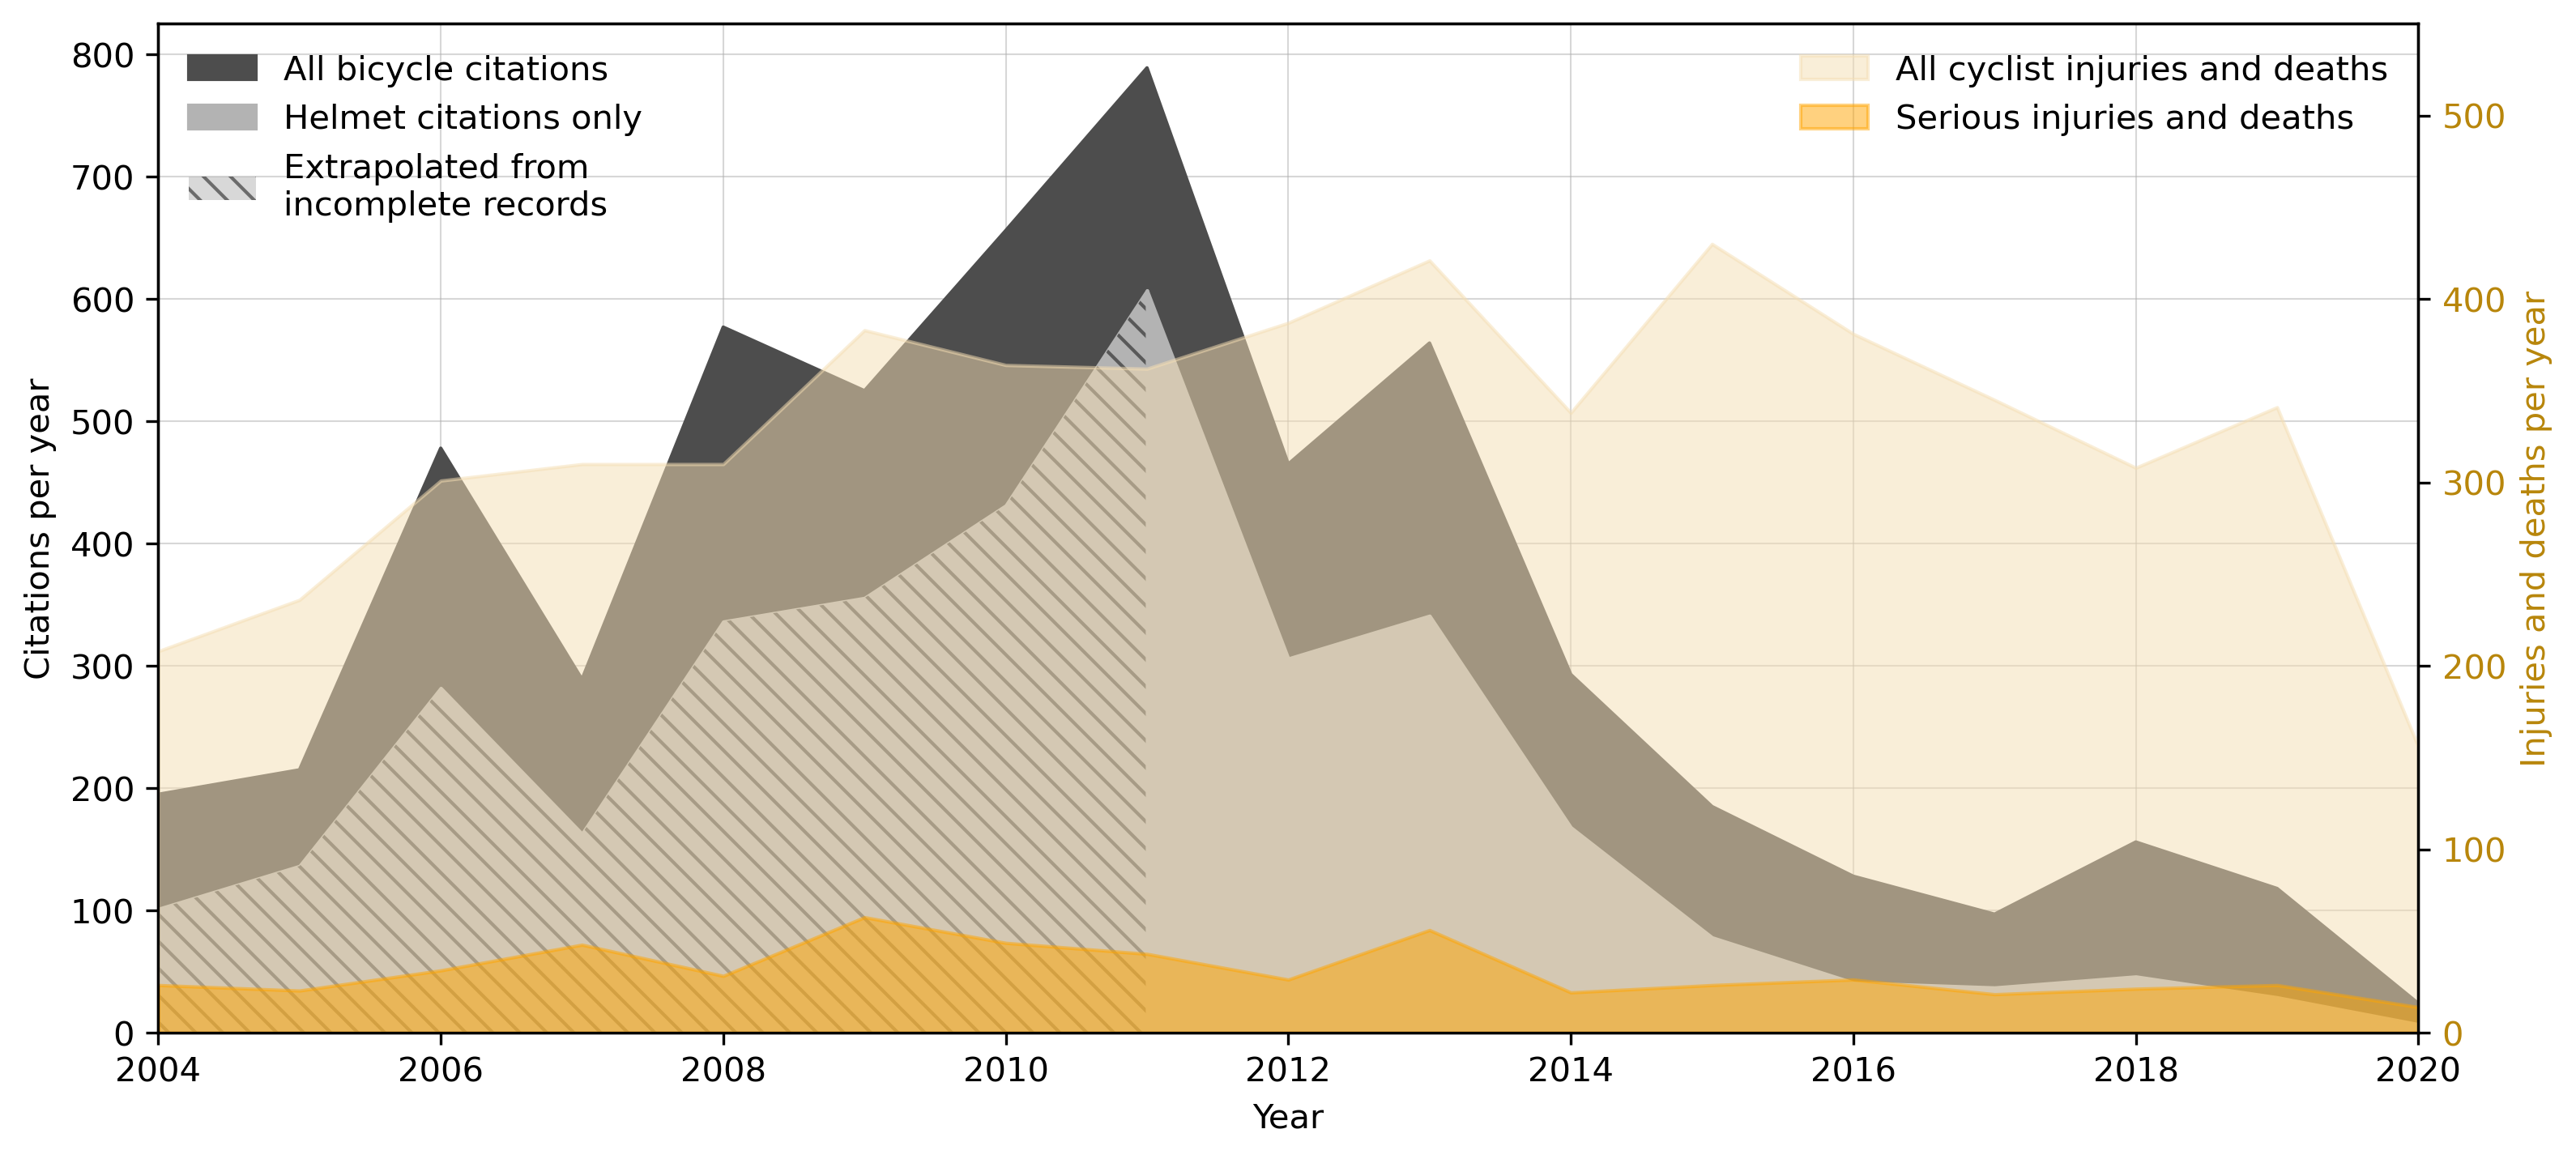

In [401]:
plt.figure(figsize=(12,5.5),facecolor='w')
plt.fill_between(x=annual_citations['Total bike citations'].index,
                 y1=annual_citations['Total bike citations'].values,
                 color='0.3',zorder=2,label='All bicycle citations')
plt.fill_between(x=annual_citations['Helmet citations'].loc[:2011].index,
                 y1=annual_citations['Helmet citations'].loc[:2011].values,
                 color='0.7',zorder=3,label='Helmet citations only')
plt.fill_between(x=annual_citations['Helmet citations'].loc[:2011].index,
                 y1=annual_citations['Helmet citations'].loc[:2011].values,
                 color='none',hatch='\\\\\\',edgecolor='k',alpha=0.5,linewidth=0.0,zorder=3)
plt.fill_between(x=[1,2],y1=[NaN,NaN],color='0.7',hatch='\\\\\\',edgecolor='k',
                 alpha=0.5,linewidth=0.0,label='Extrapolated from\nincomplete records')
plt.fill_between(x=annual_citations['Helmet citations'].loc[2011:].index,
                 y1=annual_citations['Helmet citations'].loc[2011:].values,
                 color='0.7',zorder=3)
plt.ylabel('Citations per year')
plt.xlabel('Year')
plt.legend(loc='upper left',frameon=False)
plt.grid(lw=0.5,alpha=0.5,zorder=0)
plt.xlim([2004,2020])
plt.ylim([0,825])
plt.savefig(current_results_dir + 'seattle_annual_citations.pdf')

# add SDOT collision stats
ax2 = plt.gca().twinx()
plt.fill_between(x=annual_collisions['Total injuries and deaths'].index,
                 y1=annual_collisions['Total injuries and deaths'].values,
                 color='wheat',alpha=0.5,zorder=2,label='All cyclist injuries and deaths')
plt.fill_between(x=annual_collisions['Serious injuries and deaths'].index,
                 y1=annual_collisions['Serious injuries and deaths'].values,
                 color='orange',alpha=0.5,zorder=2,label='Serious injuries and deaths')
plt.ylabel('Injuries and deaths per year',color='darkgoldenrod')
plt.gca().tick_params(axis='y',labelcolor='darkgoldenrod')
plt.legend(loc='upper right',frameon=False)
plt.ylim([0,550])

plt.savefig(current_results_dir + 'seattle_annual_citations_with_collisions.pdf')

#### Plot pie chart of Seattle bike violation types

In [219]:
# frequency distribution of all Seattle bicycle citations
viol_freq = 100 * spd_citations[['Law Description','Law Code']].value_counts(normalize=True)
viol_freq = viol_freq.reset_index()
viol_freq['Law'] = viol_freq['Law Description'].str.lstrip('Bicycle ') + ' (' + \
                   viol_freq['Law Code'].str.replace('Seattle Municipal Code','SMC')\
                                        .str.replace('King County Health Code 9.10.010A or 9.15.010',
                                                     'King County Health Code 9.10/9.15') + ')'
viol_freq = viol_freq[['Law',0]]
display(viol_freq)

,Law,0
0,Helmet Required (King County Health Code 9.10/...,55.008157
1,Rider Rights/Duties Violation (SMC 11.44.020),30.505710
2,No/Improper Lamps/Reflectors (SMC 11.44.160),6.949429
3,Yield Right of Way in Crosswalk (SMC 11.44.100),2.283850
4,Riding on Roadways Rules Violation (SMC 11.44....,1.924959
5,Unsafe Pass on Right (SMC 11.44.080),0.880914
6,Riding on Sidewalk/Public Path Rules Violation...,0.685155
7,No/Improper Hand Signals (SMC 11.44.140),0.652529
8,No/Improper Brakes (SMC 11.44.200),0.391517
9,Control One Hand Minimum Required (SMC 11.44.260),0.261011


In [220]:
# add up less frequent violations
viol_freq.loc[16] = {'Law':'Others',0:viol_freq.loc[range(8,15+1)].sum(axis=0)[0]}
viol_freq = viol_freq.drop(index=range(8,15+1))
display(viol_freq)

,Law,0
0,Helmet Required (King County Health Code 9.10/...,55.008157
1,Rider Rights/Duties Violation (SMC 11.44.020),30.505710
2,No/Improper Lamps/Reflectors (SMC 11.44.160),6.949429
3,Yield Right of Way in Crosswalk (SMC 11.44.100),2.283850
4,Riding on Roadways Rules Violation (SMC 11.44....,1.924959
5,Unsafe Pass on Right (SMC 11.44.080),0.880914
6,Riding on Sidewalk/Public Path Rules Violation...,0.685155
7,No/Improper Hand Signals (SMC 11.44.140),0.652529
16,Others,1.109299


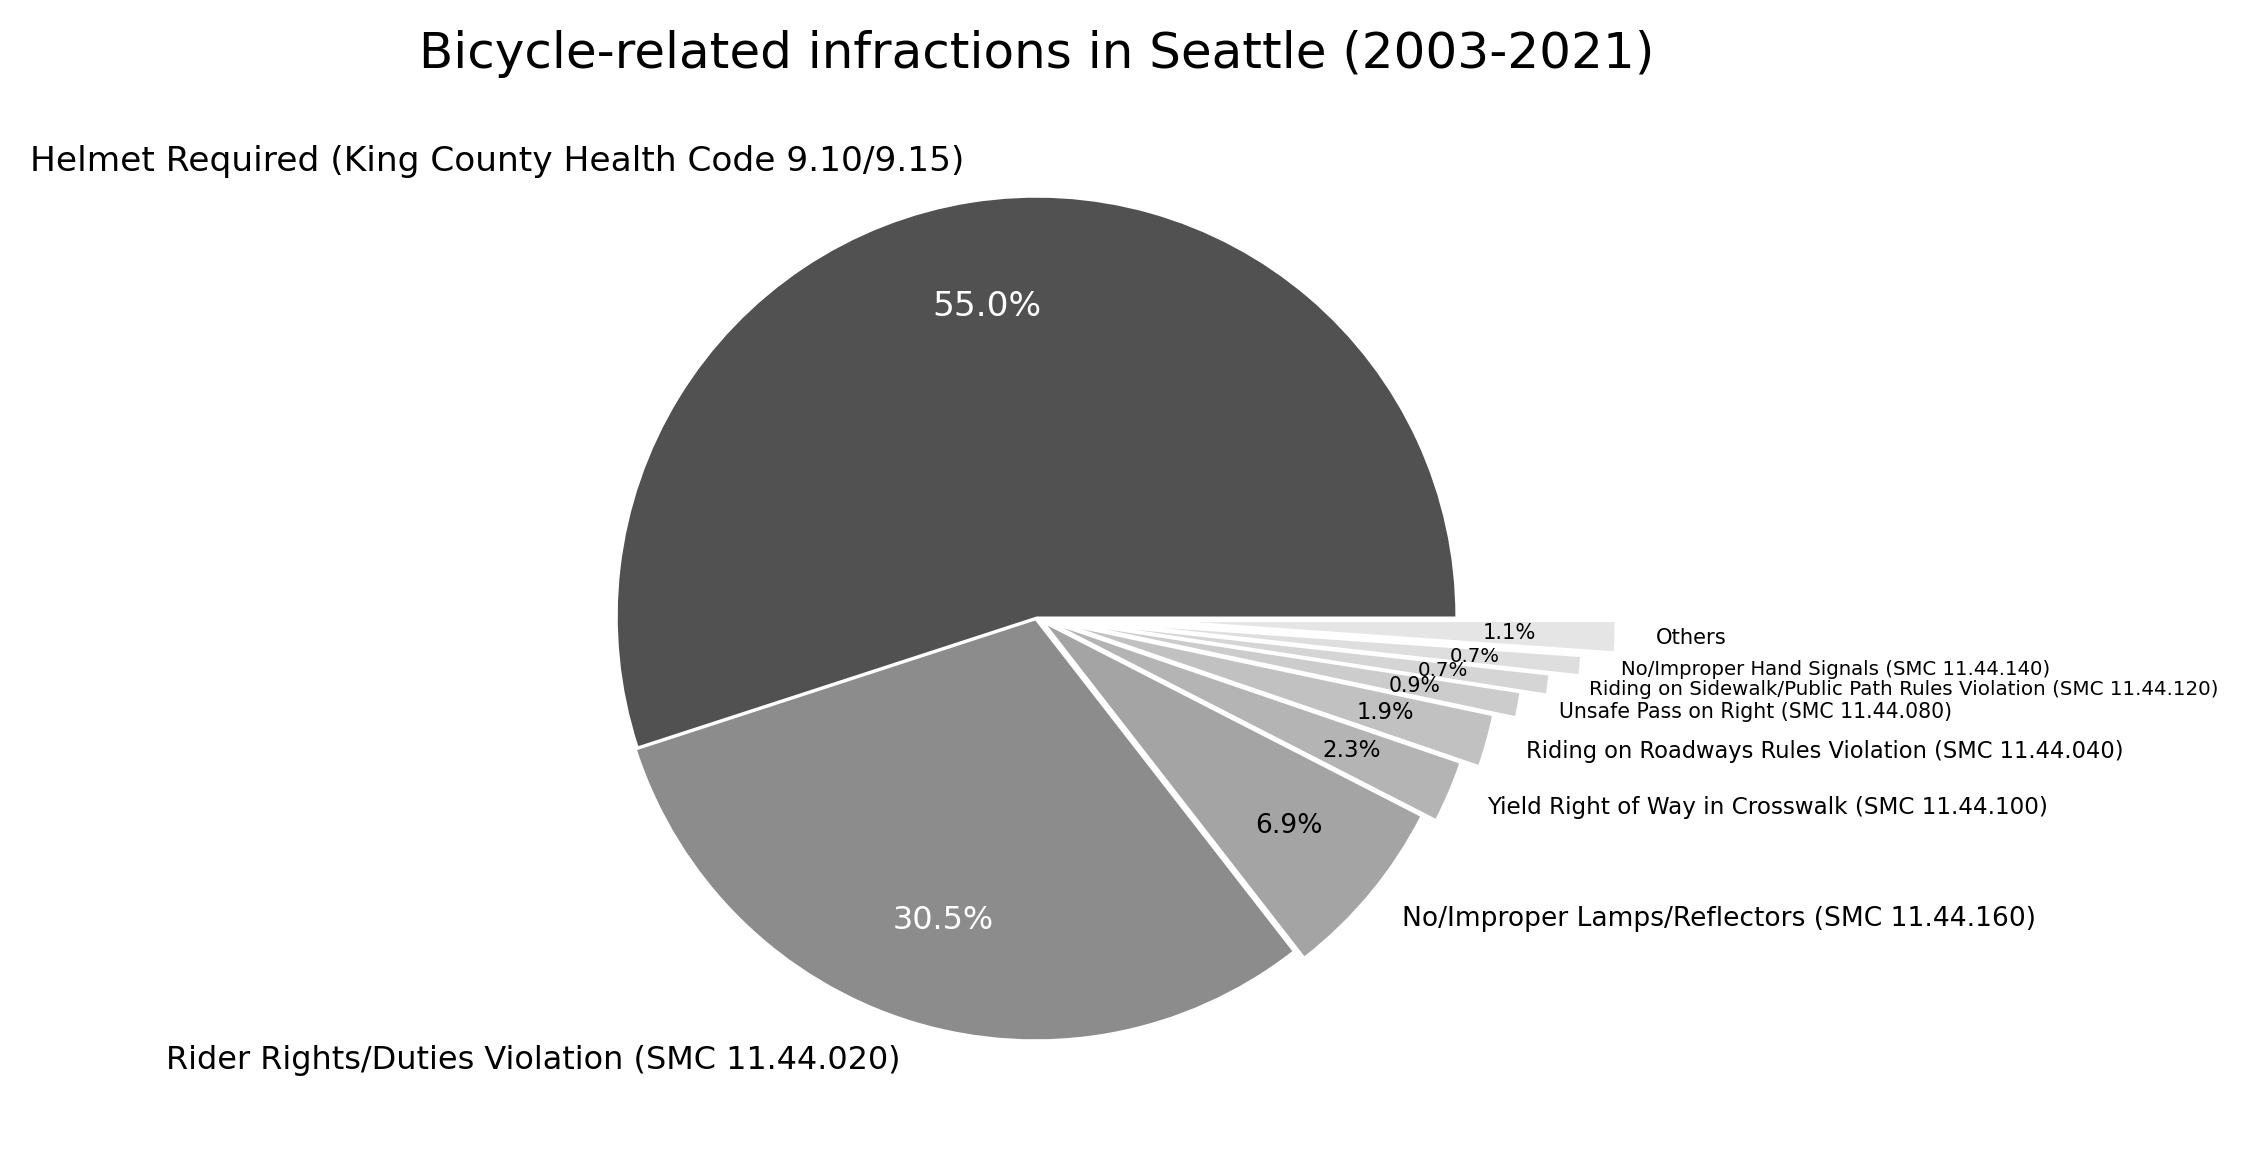

In [251]:
def autopct(percent): return ('%.1f%%' % percent)

plt.figure(figsize=(8,4),facecolor='w')
wedges, labels, autopct = plt.pie(viol_freq[0],
                                  explode=tile(0.01,len(viol_freq))*arange(len(viol_freq))**1.75,startangle=0,
                                  labels=viol_freq['Law'],
                                  colors=(linspace(0.01,0.65,len(viol_freq))**0.25).astype(str),
                                  labeldistance=1.10,autopct=autopct,pctdistance=0.75)
autopct[0].set_color('w')
autopct[1].set_color('w')
for lab_idx, lab in enumerate(labels):
    lab.set_fontsize((5*viol_freq[0]**0.125).iloc[lab_idx])
for pct_idx, pct in enumerate(autopct):
    pct.set_fontsize((5*viol_freq[0]**0.125).iloc[pct_idx])
plt.title('Bicycle-related infractions in Seattle (2003-2021)');
plt.tight_layout()
plt.savefig(current_results_dir + 'seattle_bike_infractions_pie_chart.pdf')